<a href="https://colab.research.google.com/github/IsidroJ/Colab_Archivos_Clase_PADP/blob/main/Pr%C3%A1ctica_19_Ejercicios_con_EDA_2_IJGH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 19: Ejercicios con EDA 2**

Este conjunto contiene datos de pacientes con cáncer de mama, incluyendo edad, año de operación, número de ganglios axilares y estado de supervivencia (categórico). El conjunto de datos tiene valores faltantes.

### **1. Descargar el archivo haberman.data desde el enlace proporcionado.**

In [47]:
import pandas as pd
import numpy as np

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"
column_names = ['age', 'year', 'nodes', 'status']
df = pd.read_csv(url, header=None, names=column_names)
print(df)

     age  year  nodes  status
0     30    64      1       1
1     30    62      3       1
2     30    65      0       1
3     31    59      2       1
4     31    65      4       1
..   ...   ...    ...     ...
301   75    62      1       1
302   76    67      0       1
303   77    65      3       1
304   78    65      1       2
305   83    58      2       2

[306 rows x 4 columns]


### **Realizar un EDA completo, incluyendo:**

In [48]:
from IPython.display import display, HTML
display(HTML("<h3 style='color:red; font-size:20px;'> Descripción de los datos (medias, medianas, desviaciones estándar, etc.) </h3>"))


In [49]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Informacion de las columnas, asi como el tipo de dato </h3>"))
print('\n')
print(df.info())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB
None


In [50]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Estadísticas descriptivas del dataset </h3>"))
print('\n')
print(df.describe())



              age        year       nodes      status
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    1.264706
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000


In [51]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Moda de cada columna </h3>"))
print('\n')

moda = df.mode().iloc[0]  # .iloc[0] toma solo el primer valor en caso de múltiples modas
print(moda)



age       52
year      58
nodes      0
status     1
Name: 0, dtype: int64


In [52]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Verificación de valores faltantes </h3>"))
print('\n')
print(df.isnull().sum())



age       0
year      0
nodes     0
status    0
dtype: int64


In [53]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Convertir la columna status a tipo categórica  </h3>"))

In [54]:
df['status'] = df['status'].astype(str).str.strip().astype('category')
print(df['status'].dtype)   # -> category

category


In [55]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Información de las columnas considerando el cambio del tipo de dato en status </h3>"))
print('\n')
print(df.info())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   age     306 non-null    int64   
 1   year    306 non-null    int64   
 2   nodes   306 non-null    int64   
 3   status  306 non-null    category
dtypes: category(1), int64(3)
memory usage: 7.7 KB
None


In [56]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Estadísticas descriptivas del dataset </h3>"))
print('\n')
print(df.describe())



              age        year       nodes
count  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144
std     10.803452    3.249405    7.189654
min     30.000000   58.000000    0.000000
25%     44.000000   60.000000    0.000000
50%     52.000000   63.000000    1.000000
75%     60.750000   65.750000    4.000000
max     83.000000   69.000000   52.000000


In [57]:
display(HTML("<h3 style='color:red; font-size:20px;'> Histogramas para las columnas numéricas </h3>"))

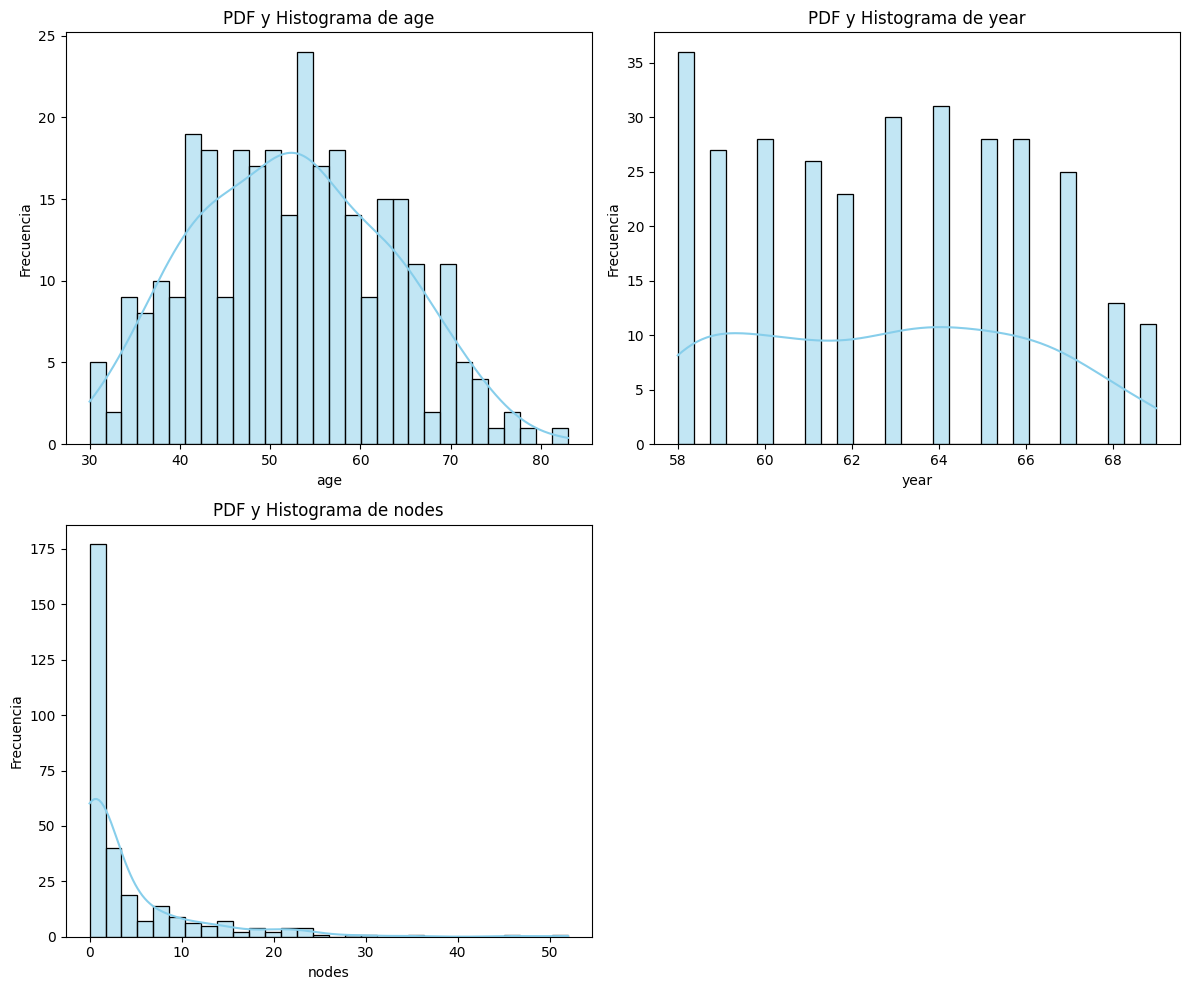

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset diamonds de Seaborn
#df = sns.load_dataset('diamonds')

# Crear una lista de las columnas del dataset
columns = df.select_dtypes(include=['float64', 'int64']).columns

# Crear los gráficos de PDF e Histograma
plt.figure(figsize=(12, 10))
for i, col in enumerate(columns, 1):
    plt.subplot(2, 2, i)  # Ajustar la cantidad de subgráficos según el número de columnas
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'PDF y Histograma de {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frecuencia', fontsize=10)

plt.tight_layout()
plt.show()

In [59]:
display(HTML("<h3 style='color:red; font-size:20px;'> Gráfica de barras para la columna categórica 'staus'  </h3>"))

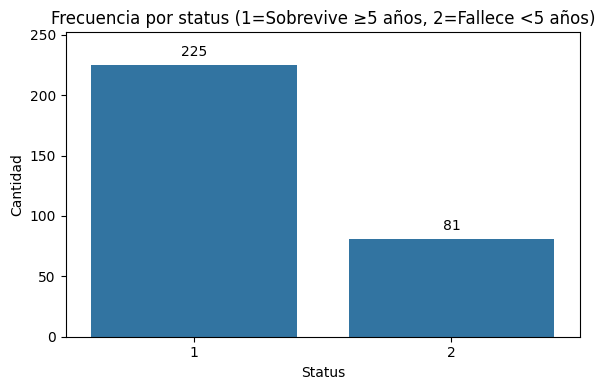

In [60]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x=df['status'])
ax.set_title('Frecuencia por status (1=Sobrevive ≥5 años, 2=Fallece <5 años)')
ax.set_xlabel('Status'); ax.set_ylabel('Cantidad')

max_count = max(p.get_height() for p in ax.patches)
ax.set_ylim(0, max_count * 1.12)

for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}',
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=10,
                xytext=(0, 4), textcoords='offset points')

plt.tight_layout()
plt.show()

In [61]:
display(HTML("<h3 style='color:red; font-size:20px;'> Boxplots para identificar outliers en las columnas numéricas  </h3>"))

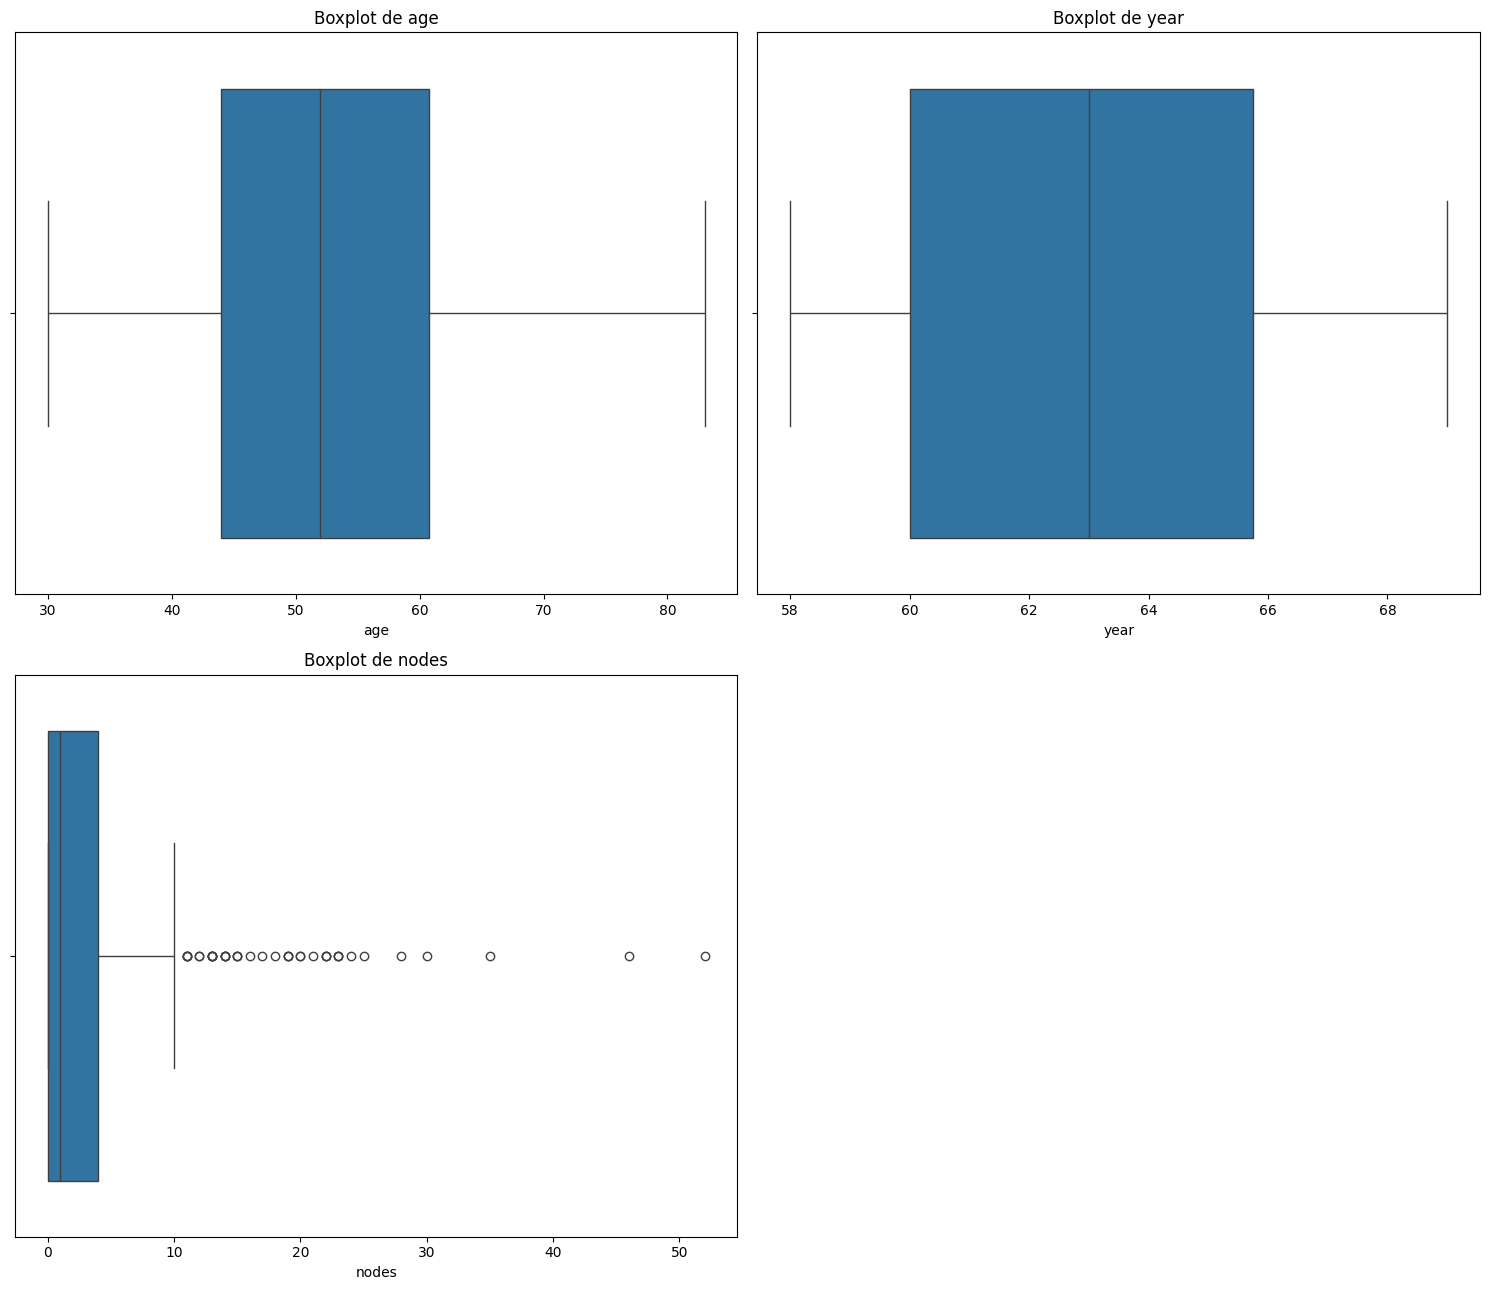

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo columnas numéricas
numeric_columns = ["age", "year", "nodes"]

# Configurar el tamaño de la figura
plt.figure(figsize=(15, 13))

# Crear boxplots para cada columna numérica
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)  # 2 filas, 4 columnas de subplots
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

In [63]:
display(HTML("<h3 style='color:red; font-size:20px;'> Matriz de correlación y mapa de calor  </h3>"))

Matriz de correlación (Pearson) - variables seleccionadas:
         age   year  nodes
age    1.000  0.090 -0.063
year   0.090  1.000 -0.004
nodes -0.063 -0.004  1.000


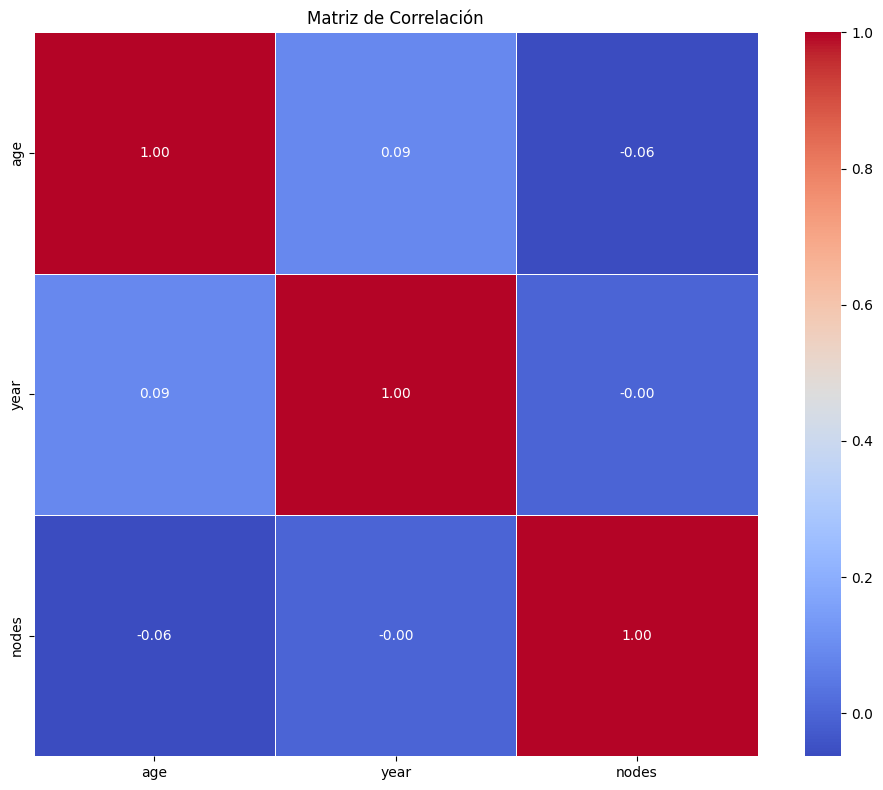

In [64]:
vars_sel = ["age", "year", "nodes"]

num_df = (
    df[vars_sel]
    .replace(-200, np.nan)                       # sentinela típico
    .apply(pd.to_numeric, errors='coerce')       # asegura tipo numérico
)

# Matriz de correlación (Pearson por defecto)
corr_matrix = num_df.corr()

print("Matriz de correlación (Pearson) - variables seleccionadas:")
print(corr_matrix.round(3))

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f',
            linewidths=0.5, square=True)
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

In [65]:
display(HTML("<h3 style='color:red; font-size:20px;'> Pairplot para visualizar relaciones entre variables numéricas  </h3>"))

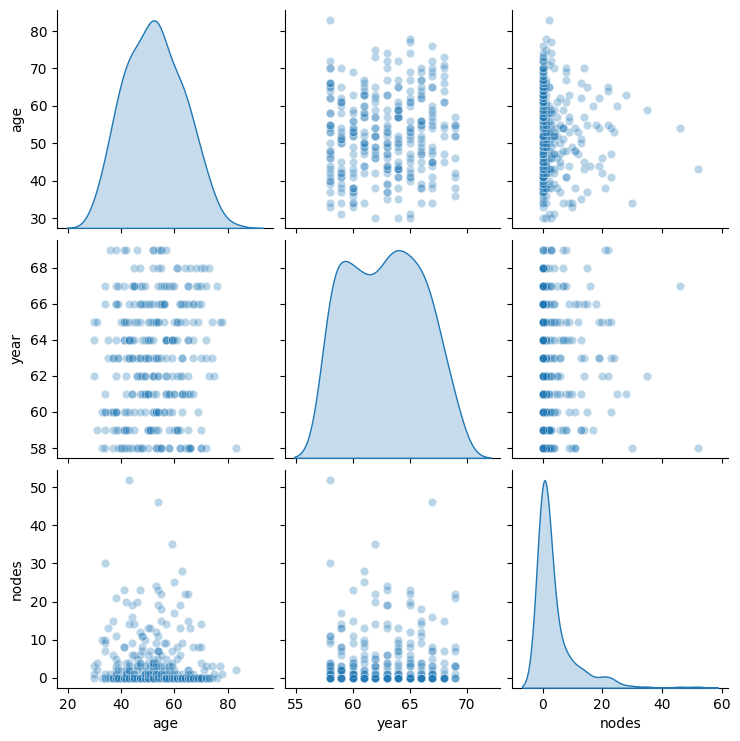

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar solo las columnas numéricas
numerical_cols = ["age", "year", "nodes"]

# Crear un scatterplot para todas las combinaciones de variables numéricas
sns.pairplot(df[numerical_cols], plot_kws={'alpha': 0.3}, diag_kind='kde')

# Mostrar el gráfico
plt.show()

In [67]:
display(HTML("<h3 style='color:red; font-size:20px;'> Pruebas de normalidad (Shapiro-Wilk, Anderson-Darling, Kolmogorov-Smirnov) y QQplot para las columnas numéricas  </h3>"))


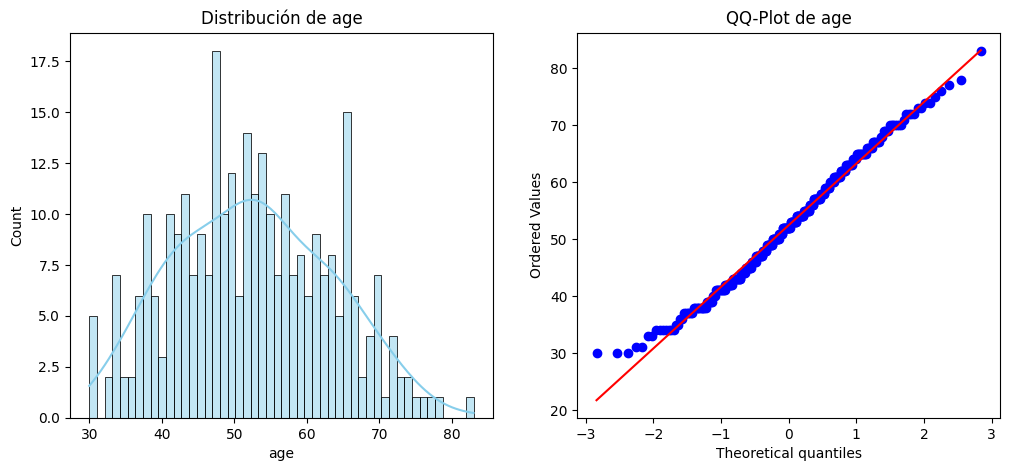


Pruebas de normalidad para la columna: age
Shapiro-Wilk Test: p-valor = 0.02605
Kolmogorov-Smirnov Test: p-valor = 0.46980
Anderson-Darling Test: Estadístico = 0.73156
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos parecen normales.
  Al nivel de significancia 2.5%, los datos parecen normales.
  Al nivel de significancia 1.0%, los datos parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00780


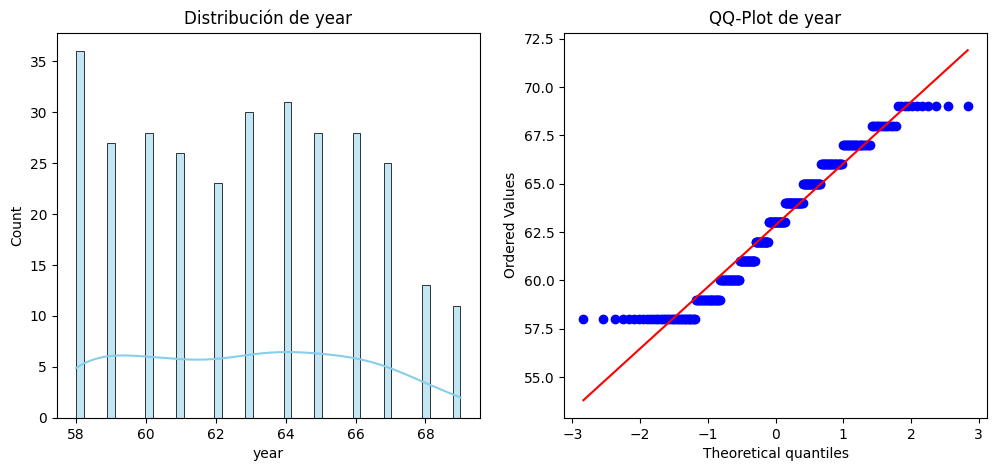


Pruebas de normalidad para la columna: year
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00158
Anderson-Darling Test: Estadístico = 4.31374
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


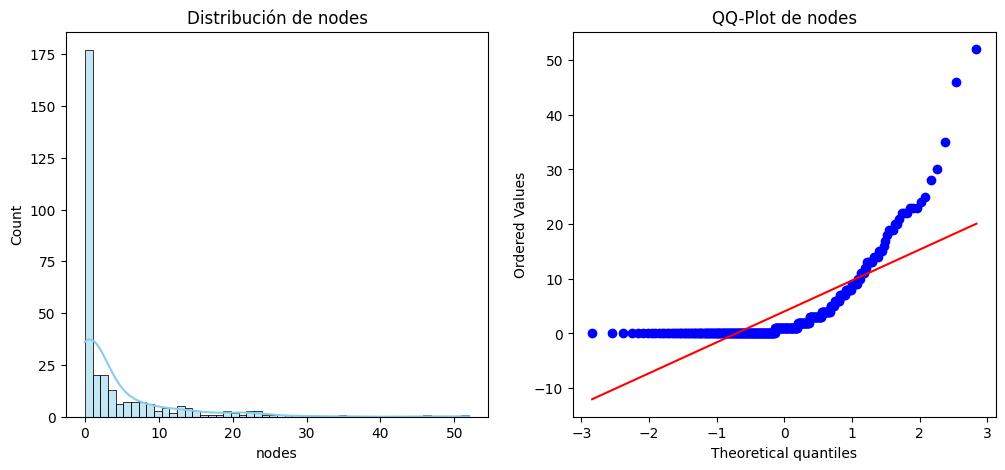


Pruebas de normalidad para la columna: nodes
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 39.68662
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

# Seleccionar solo columnas numéricas
numeric_columns = ["age", "year", "nodes"]

# Función para realizar pruebas de normalidad
def normality_tests(data, column_name):
    print(f"\nPruebas de normalidad para la columna: {column_name}")

    # Prueba de Shapiro-Wilk
    shapiro_test = stats.shapiro(data.sample(min(5000, len(data)), random_state=42))  # Muestra de 5000 para evitar problemas de cómputo
    print(f"Shapiro-Wilk Test: p-valor = {shapiro_test.pvalue:.5f}")

    # Prueba de Kolmogorov-Smirnov
    ks_test = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
    print(f"Kolmogorov-Smirnov Test: p-valor = {ks_test.pvalue:.5f}")

    # Prueba de Anderson-Darling
    anderson_test = stats.anderson(data, dist='norm')
    print(f"Anderson-Darling Test: Estadístico = {anderson_test.statistic:.5f}")
    for i in range(len(anderson_test.critical_values)):
        sl, cv = anderson_test.significance_level[i], anderson_test.critical_values[i]
        if anderson_test.statistic < cv:
            print(f"  Al nivel de significancia {sl}%, los datos parecen normales.")
        else:
            print(f"  Al nivel de significancia {sl}%, los datos NO parecen normales.")

    # Prueba de D'Agostino-Pearson
    dagostino_test = stats.normaltest(data)
    print(f"D'Agostino-Pearson Test: p-valor = {dagostino_test.pvalue:.5f}")

# Función para graficar histograma y QQ-Plot
def plot_distribution(data, column_name):
    plt.figure(figsize=(12, 5))

    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(data, bins=50, kde=True, color="skyblue")
    plt.title(f"Distribución de {column_name}")

    # QQ-Plot
    plt.subplot(1, 2, 2)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f"QQ-Plot de {column_name}")

    plt.show()

# Aplicar pruebas de normalidad y gráficos a cada columna numérica
for column in numeric_columns:
    data = df[column]
    plot_distribution(data, column)
    normality_tests(data, column)

In [69]:
display(HTML("<h3 style='color:red; font-size:20px;'> Identificar y tratar los datos faltantes utilizando técnicas como imputación por media, mediana o moda, o eliminación de filas/columnas según sea apropiado.  </h3>"))


**El conjunto de datos no presenta datos faltantes. Sin embargo, en la variable nodes (ganglios linfáticos) se encuentran varios ceros. Esos valores los vamos a convertir como dato faltante y se hará una imputación por promedio.**

In [70]:
df['nodes'] = pd.to_numeric(df['nodes'], errors='coerce')
print("Ceros en 'nodes' antes:", (df['nodes'] == 0).sum())

# Reemplazar 0 -> NaN
df.loc[df['nodes'] == 0, 'nodes'] = np.nan

print("Ceros en 'nodes' después:", (df['nodes'] == 0).sum())
print("Faltantes en 'nodes' ahora:", df['nodes'].isna().sum())

Ceros en 'nodes' antes: 136
Ceros en 'nodes' después: 0
Faltantes en 'nodes' ahora: 136


In [71]:
print("NaN antes:", df['nodes'].isna().sum())

mode_val = df['nodes'].dropna().value_counts().idxmax()
df['nodes'] = df['nodes'].fillna(mode_val)
print("Moda usada:", mode_val)
print("NaN después:", df['nodes'].isna().sum())

NaN antes: 136
Moda usada: 1.0
NaN después: 0


In [ ]:
display(HTML("<h3 style='color:red; font-size:20px;'> Descripción de los datos del DataFrame limpio (medias, medianas, desviaciones estándar, etc.) </h3>"))


In [72]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Estadísticas descriptivas del dataset limpio </h3>"))
print('\n')
print(df.describe())



              age        year       nodes
count  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.470588
std     10.803452    3.249405    6.953295
min     30.000000   58.000000    1.000000
25%     44.000000   60.000000    1.000000
50%     52.000000   63.000000    1.000000
75%     60.750000   65.750000    4.000000
max     83.000000   69.000000   52.000000


In [74]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Moda de cada columna </h3>"))
print('\n')

moda = df.mode().iloc[0]  # .iloc[0] toma solo el primer valor en caso de múltiples modas
print(moda)



age        52
year       58
nodes     1.0
status      1
Name: 0, dtype: object


In [75]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Verificación de valores faltantes </h3>"))
print('\n')
print(df.isnull().sum())



age       0
year      0
nodes     0
status    0
dtype: int64


In [76]:
display(HTML("<h3 style='color:red; font-size:20px;'> Histogramas para las columnas numéricas del dataset limpio </h3>"))

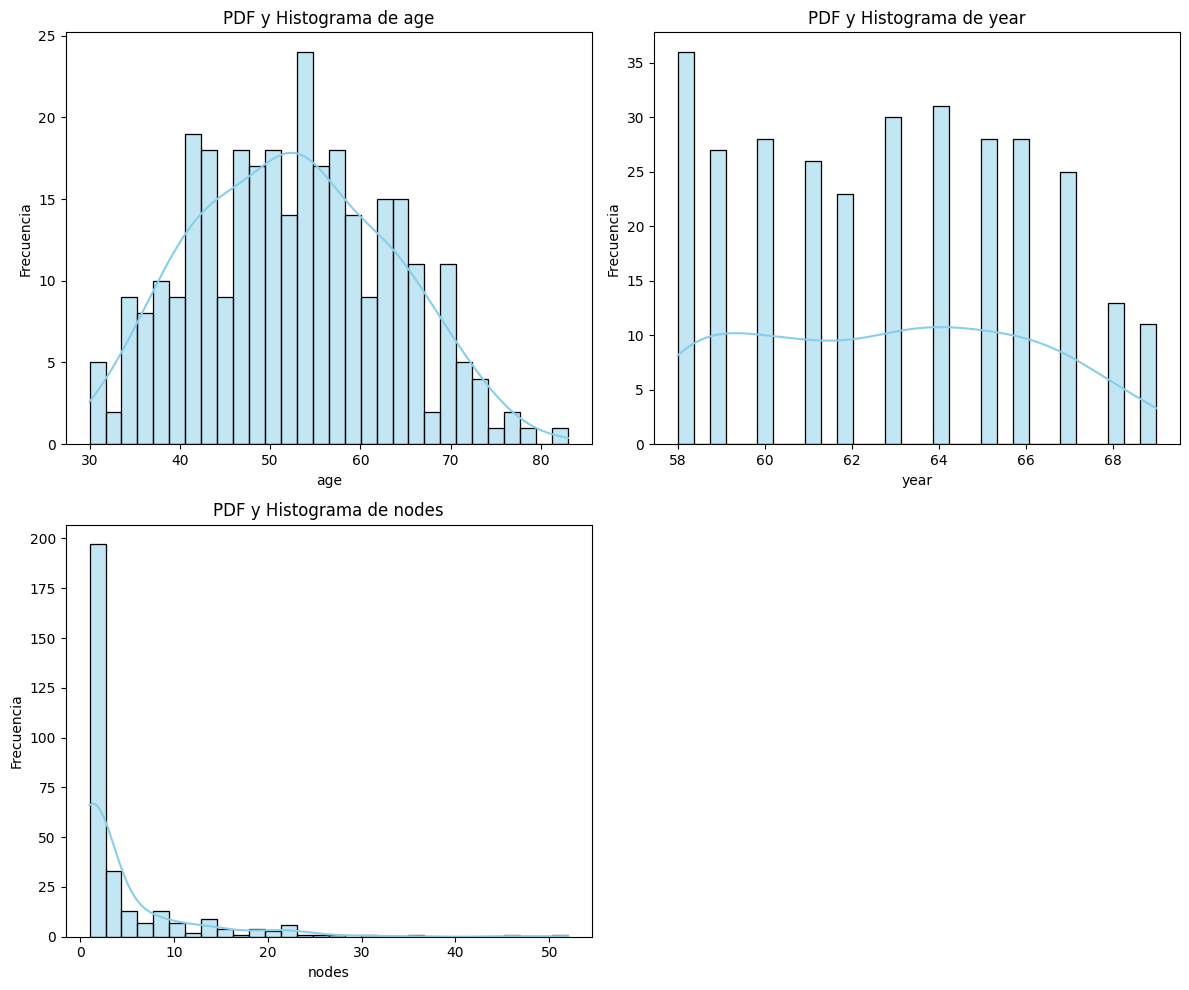

In [78]:
columns = ["age", "year", "nodes"]

# Crear los gráficos de PDF e Histograma
plt.figure(figsize=(12, 10))
for i, col in enumerate(columns, 1):
    plt.subplot(2, 2, i)  # Ajustar la cantidad de subgráficos según el número de columnas
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'PDF y Histograma de {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frecuencia', fontsize=10)

plt.tight_layout()
plt.show()

In [79]:
display(HTML("<h3 style='color:red; font-size:20px;'> Boxplots para identificar outliers en las columnas numéricas del dataset limpio </h3>"))

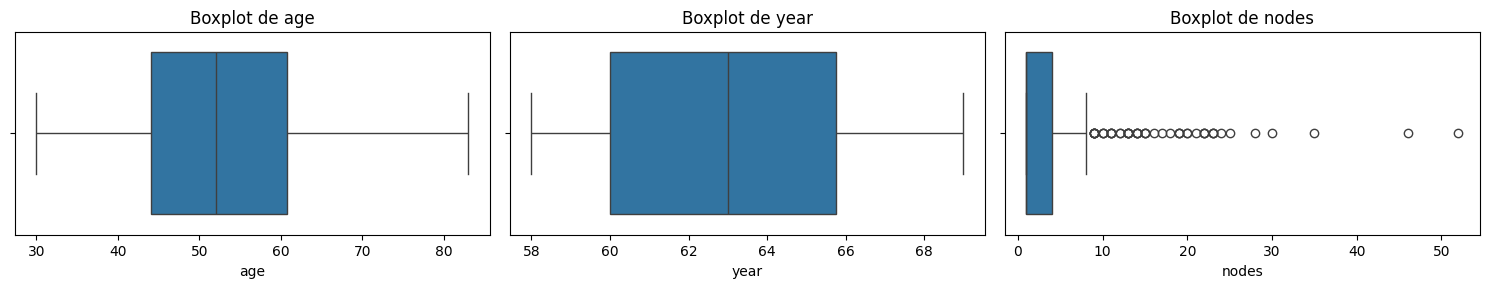

In [80]:
numeric_columns = ["age", "year", "nodes"]

# Configurar el tamaño de la figura
plt.figure(figsize=(15, 13))

# Crear boxplots para cada columna numérica
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(5, 3, i)  # 2 filas, 4 columnas de subplots
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

In [81]:
display(HTML("<h3 style='color:red; font-size:20px;'> Matriz de correlación y mapa de calor del dataset limpio </h3>"))

Matriz de correlación (Pearson) - variables seleccionadas:
         age   year  nodes
age    1.000  0.090 -0.058
year   0.090  1.000  0.001
nodes -0.058  0.001  1.000


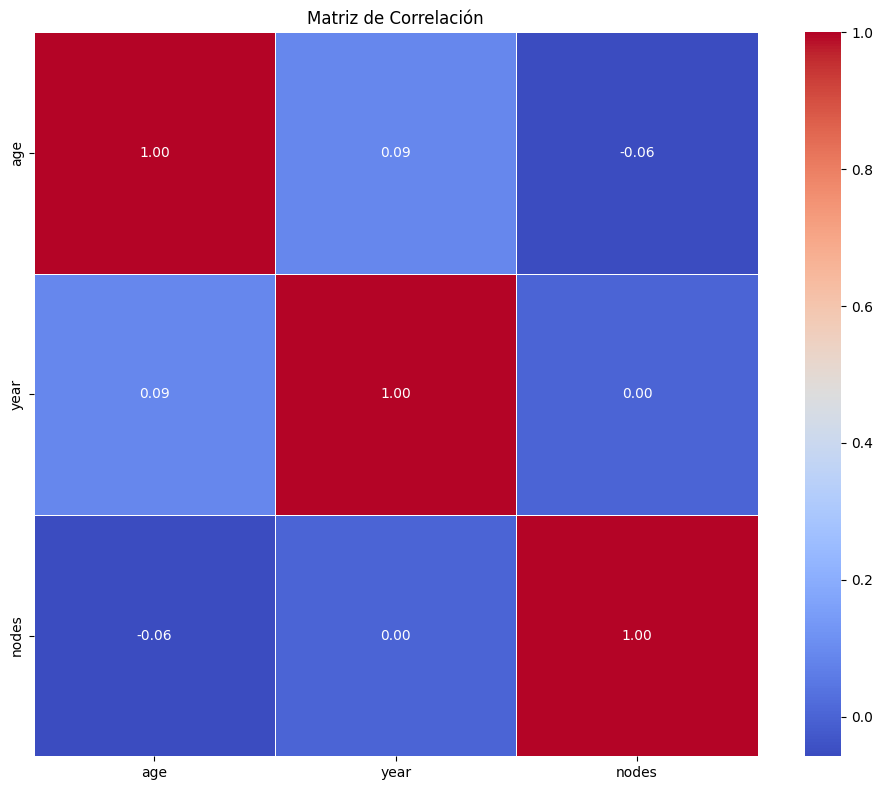

In [82]:
vars_sel = ["age", "year", "nodes"]

num_df = (
    df[vars_sel]
    .replace(-200, np.nan)                       # sentinela típico
    .apply(pd.to_numeric, errors='coerce')       # asegura tipo numérico
)

# Matriz de correlación (Pearson por defecto)
corr_matrix = num_df.corr()

print("Matriz de correlación (Pearson) - variables seleccionadas:")
print(corr_matrix.round(3))

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f',
            linewidths=0.5, square=True)
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

In [83]:
display(HTML("<h3 style='color:red; font-size:20px;'> Pairplot para visualizar relaciones entre variables numéricas del dataset limpio </h3>"))

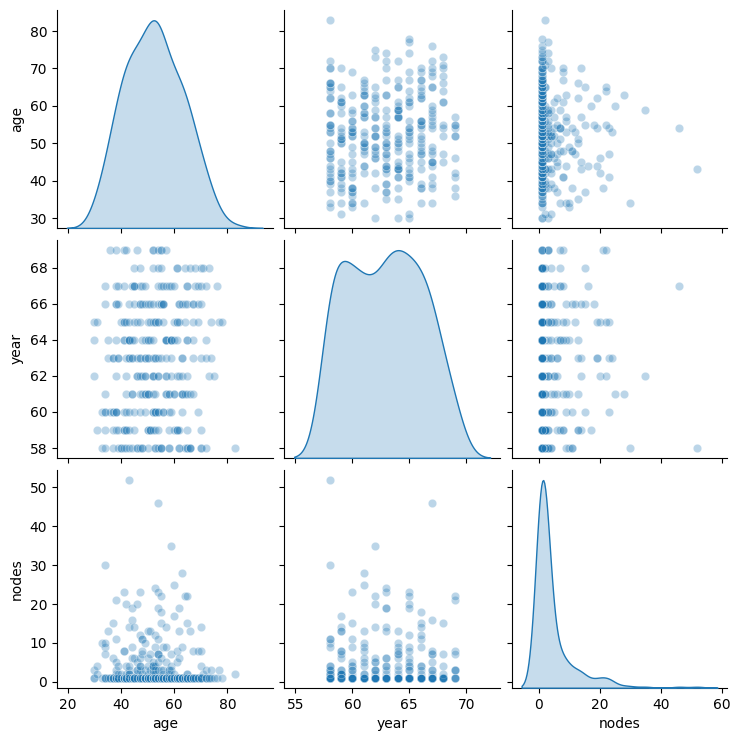

In [84]:
numerical_cols = ["age", "year", "nodes"]

# Crear un scatterplot para todas las combinaciones de variables numéricas
sns.pairplot(df[numerical_cols], plot_kws={'alpha': 0.3}, diag_kind='kde')

# Mostrar el gráfico
plt.show()

In [85]:
display(HTML("<h3 style='color:red; font-size:20px;'> Pruebas de normalidad (Shapiro-Wilk, Anderson-Darling, Kolmogorov-Smirnov) y QQplot para las columnas numéricas  </h3>"))

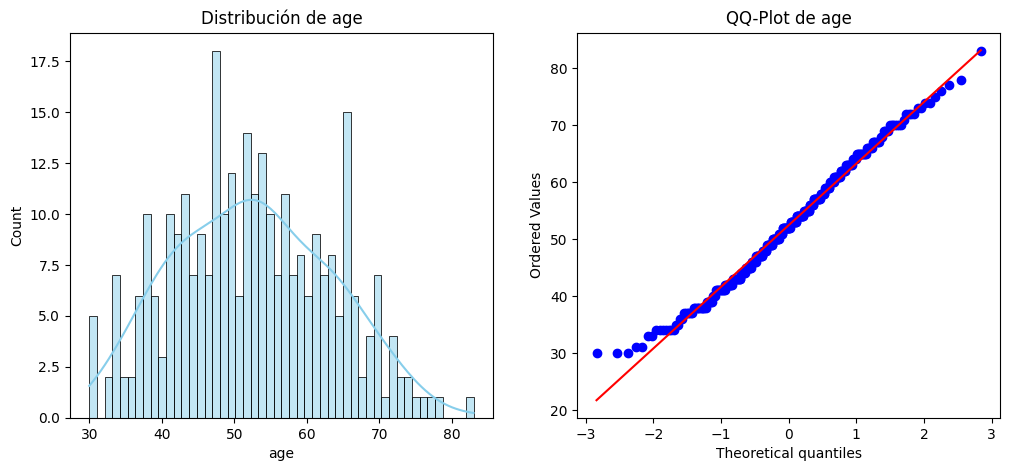


Pruebas de normalidad para la columna: age
Shapiro-Wilk Test: p-valor = 0.02605
Kolmogorov-Smirnov Test: p-valor = 0.46980
Anderson-Darling Test: Estadístico = 0.73156
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos parecen normales.
  Al nivel de significancia 2.5%, los datos parecen normales.
  Al nivel de significancia 1.0%, los datos parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00780


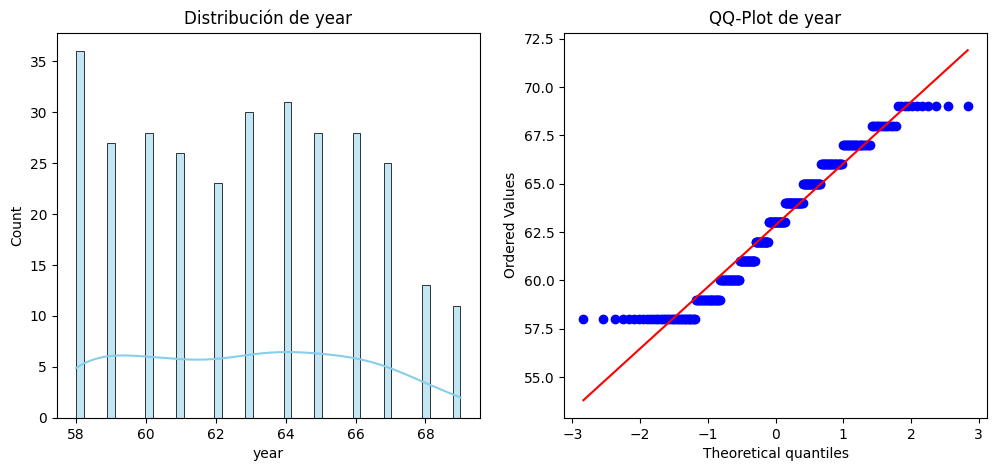


Pruebas de normalidad para la columna: year
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00158
Anderson-Darling Test: Estadístico = 4.31374
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


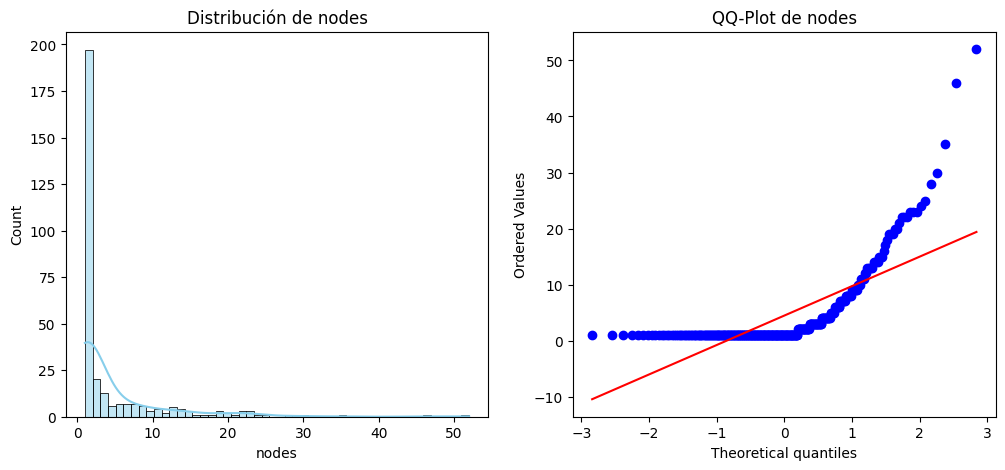


Pruebas de normalidad para la columna: nodes
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 47.60590
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


In [87]:
numeric_columns = ["age", "year", "nodes"]

# Función para realizar pruebas de normalidad
def normality_tests(data, column_name):
    print(f"\nPruebas de normalidad para la columna: {column_name}")

    # Prueba de Shapiro-Wilk
    shapiro_test = stats.shapiro(data.sample(min(5000, len(data)), random_state=42))  # Muestra de 5000 para evitar problemas de cómputo
    print(f"Shapiro-Wilk Test: p-valor = {shapiro_test.pvalue:.5f}")

    # Prueba de Kolmogorov-Smirnov
    ks_test = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
    print(f"Kolmogorov-Smirnov Test: p-valor = {ks_test.pvalue:.5f}")

    # Prueba de Anderson-Darling
    anderson_test = stats.anderson(data, dist='norm')
    print(f"Anderson-Darling Test: Estadístico = {anderson_test.statistic:.5f}")
    for i in range(len(anderson_test.critical_values)):
        sl, cv = anderson_test.significance_level[i], anderson_test.critical_values[i]
        if anderson_test.statistic < cv:
            print(f"  Al nivel de significancia {sl}%, los datos parecen normales.")
        else:
            print(f"  Al nivel de significancia {sl}%, los datos NO parecen normales.")

    # Prueba de D'Agostino-Pearson
    dagostino_test = stats.normaltest(data)
    print(f"D'Agostino-Pearson Test: p-valor = {dagostino_test.pvalue:.5f}")

# Función para graficar histograma y QQ-Plot
def plot_distribution(data, column_name):
    plt.figure(figsize=(12, 5))

    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(data, bins=50, kde=True, color="skyblue")
    plt.title(f"Distribución de {column_name}")

    # QQ-Plot
    plt.subplot(1, 2, 2)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f"QQ-Plot de {column_name}")

    plt.show()

# Aplicar pruebas de normalidad y gráficos a cada columna numérica
for column in numeric_columns:
    data = df[column]
    plot_distribution(data, column)
    normality_tests(data, column)